In [18]:
import torch
import torchvision
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt
import numpy as np

def show_rgb_channels(image, figsize=(10, 10)):
    # Convert image to numpy array if it's a PIL image
    if isinstance(image, Image.Image):
        image = np.array(image)
    
    # Handle different formats
    if isinstance(image, torch.Tensor):
        image = image.permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C) if needed

    if image.max() > 1.0:  # If values are in the range [0, 255], normalize them to [0, 1]
        image = image / 255.0
    
    # Create copies for red, green, and blue channels
    red_channel = image.copy()
    green_channel = image.copy()
    blue_channel = image.copy()
    
    # Zero out the appropriate channels
    red_channel[:, :, 1] = 0  # Zero out green
    red_channel[:, :, 2] = 0  # Zero out blue
    
    green_channel[:, :, 0] = 0  # Zero out red
    green_channel[:, :, 2] = 0  # Zero out blue
    
    blue_channel[:, :, 0] = 0  # Zero out red
    blue_channel[:, :, 1] = 0  # Zero out green
    
    # Plotting
    fig, axs = plt.subplots(2, 2, figsize=figsize)
    
    # Show original image
    axs[0, 0].imshow(image)
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')
    
    # Show red channel
    axs[0, 1].imshow(red_channel)
    axs[0, 1].set_title('Red Channel')
    axs[0, 1].axis('off')
    
    # Show green channel
    axs[1, 0].imshow(green_channel)
    axs[1, 0].set_title('Green Channel')
    axs[1, 0].axis('off')
    
    # Show blue channel
    axs[1, 1].imshow(blue_channel)
    axs[1, 1].set_title('Blue Channel')
    axs[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()


Files already downloaded and verified


<Figure size 640x480 with 0 Axes>

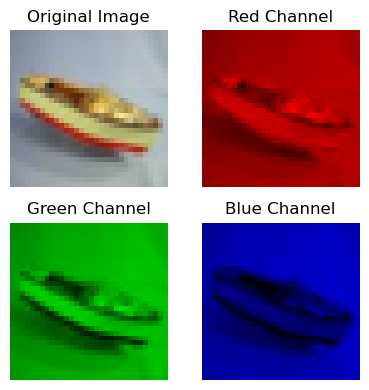

In [20]:
# Define transformation (converting images to tensors)
transform = transforms.Compose([
    transforms.ToTensor()  # Converts the image to a tensor with values in [0, 1]
])

# Load the CIFAR10 dataset
trainset = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=transform)

# Select a random image and its label
random_index = random.randint(0, len(trainset) - 1)
image, label = trainset[random_index]

# CIFAR-10 classes
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the image and its channels
plt.figure()
plt.suptitle(f'Label: {classes[label]}', fontsize=16)
show_rgb_channels(image, figsize=(4,4))


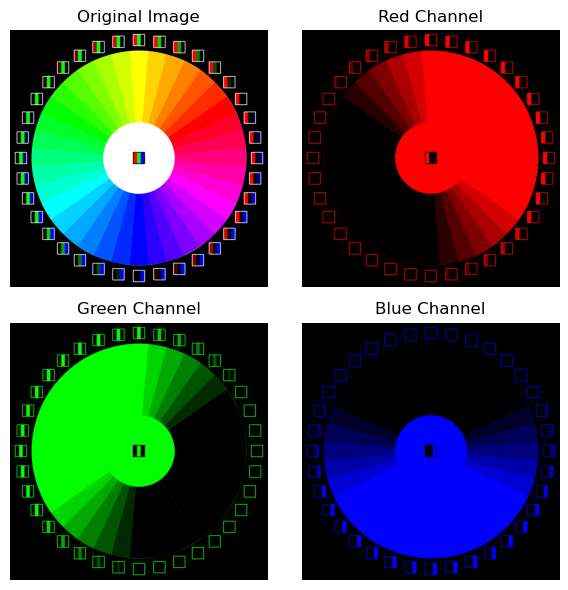

In [25]:
# Load the image from the current directory
image_path = 'rgb_color_wheel.png' # From Wikipedia: https://en.wikipedia.org/wiki/RGB_color_model
image = Image.open(image_path).convert('RGB')

# Display the image and its RGB channels using the show_rgb_channels function
show_rgb_channels(image,figsize=(6,6))


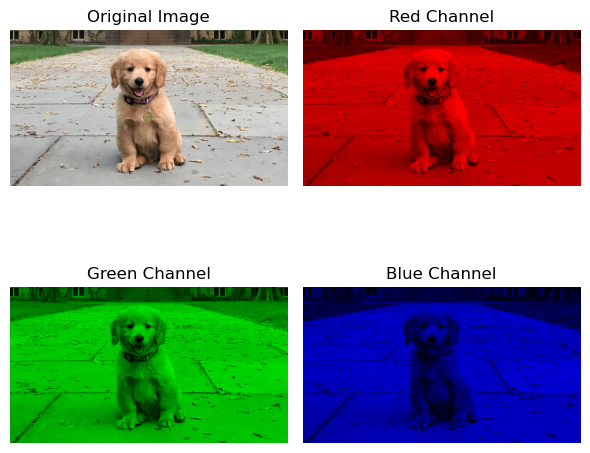

In [26]:
# Load the image from the current directory
image_path = 'dog.jpg' # From Wikipedia: https://en.wikipedia.org/wiki/RGB_color_model
image = Image.open(image_path).convert('RGB')

# Display the image and its RGB channels using the show_rgb_channels function
show_rgb_channels(image,figsize=(6,6))